<a href="https://colab.research.google.com/github/shohdy-source/Machine-Learing-Deep-Learning-/blob/main/Ann%20_%20Gender%20Classification%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

we have a rather small dataset of personal preferences and are the handed the task of trying to predict binary gender based on the data. 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
import io


In [2]:
from google.colab import files


uploaded = files.upload()

Saving Transformed Data Set - Sheet1.csv to Transformed Data Set - Sheet1.csv


In [5]:
data = pd.read_csv(io.BytesIO(uploaded['Transformed Data Set - Sheet1.csv']))
data

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
...,...,...,...,...,...
61,Cool,Rock,Vodka,Coca Cola/Pepsi,M
62,Cool,Hip hop,Beer,Coca Cola/Pepsi,M
63,Neutral,Hip hop,Doesn't drink,Fanta,M
64,Cool,Rock,Wine,Coca Cola/Pepsi,M


**Preprocessing**


In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


In [7]:
data.isna().sum()


Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

In [8]:
{column: list(data[column].unique()) for column in data.columns}


{'Favorite Beverage': ['Vodka',
  'Wine',
  'Whiskey',
  "Doesn't drink",
  'Beer',
  'Other'],
 'Favorite Color': ['Cool', 'Neutral', 'Warm'],
 'Favorite Music Genre': ['Rock',
  'Hip hop',
  'Folk/Traditional',
  'Jazz/Blues',
  'Pop',
  'Electronic',
  'R&B and soul'],
 'Favorite Soft Drink': ['7UP/Sprite', 'Coca Cola/Pepsi', 'Fanta', 'Other'],
 'Gender': ['F', 'M']}

**Encoding**

**Nominal Encoding**

In [9]:
def add_prefixes(df, column, prefix):
    return df[column].apply(lambda x: prefix + x)

In [10]:
data['Favorite Beverage'] = add_prefixes(data, 'Favorite Beverage', 'b_')
data['Favorite Soft Drink'] = add_prefixes(data, 'Favorite Soft Drink', 's_')

In [11]:
data


,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,b_Vodka,s_7UP/Sprite,F
1,Neutral,Hip hop,b_Vodka,s_Coca Cola/Pepsi,F
2,Warm,Rock,b_Wine,s_Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,b_Whiskey,s_Fanta,F
4,Cool,Rock,b_Vodka,s_Coca Cola/Pepsi,F
...,...,...,...,...,...
61,Cool,Rock,b_Vodka,s_Coca Cola/Pepsi,M
62,Cool,Hip hop,b_Beer,s_Coca Cola/Pepsi,M
63,Neutral,Hip hop,b_Doesn't drink,s_Fanta,M
64,Cool,Rock,b_Wine,s_Coca Cola/Pepsi,M


In [13]:
def onehot_encode(df, columns):
    for column in columns:
        dummies = pd.get_dummies(df[column])
        df = pd.concat([df, dummies], axis=1)
        df.drop(column, axis=1, inplace=True)
    return df

In [14]:
data = onehot_encode(data, ['Favorite Music Genre', 'Favorite Beverage', 'Favorite Soft Drink'])

In [15]:
data


,Favorite Color,Gender,Electronic,Folk/Traditional,Hip hop,Jazz/Blues,Pop,R&B and soul,Rock,b_Beer,b_Doesn't drink,b_Other,b_Vodka,b_Whiskey,b_Wine,s_7UP/Sprite,s_Coca Cola/Pepsi,s_Fanta,s_Other
0,Cool,F,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
1,Neutral,F,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,Warm,F,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
3,Warm,F,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,Cool,F,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Cool,M,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
62,Cool,M,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
63,Neutral,M,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
64,Cool,M,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0


**Ordinal Encoding**

In [16]:
color_ordering = list(data['Favorite Color'].unique())
color_ordering

['Cool', 'Neutral', 'Warm']

In [17]:
data['Favorite Color'] = data['Favorite Color'].apply(lambda x: color_ordering.index(x))

**Label Encoding**

In [19]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
gender_mappings = {index: value for index, value in enumerate(label_encoder.classes_)}

In [20]:
gender_mappings


{0: 0, 1: 1}

In [21]:
data


,Favorite Color,Gender,Electronic,Folk/Traditional,Hip hop,Jazz/Blues,Pop,R&B and soul,Rock,b_Beer,b_Doesn't drink,b_Other,b_Vodka,b_Whiskey,b_Wine,s_7UP/Sprite,s_Coca Cola/Pepsi,s_Fanta,s_Other
0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
3,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
62,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
63,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
64,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0


**Visualization**

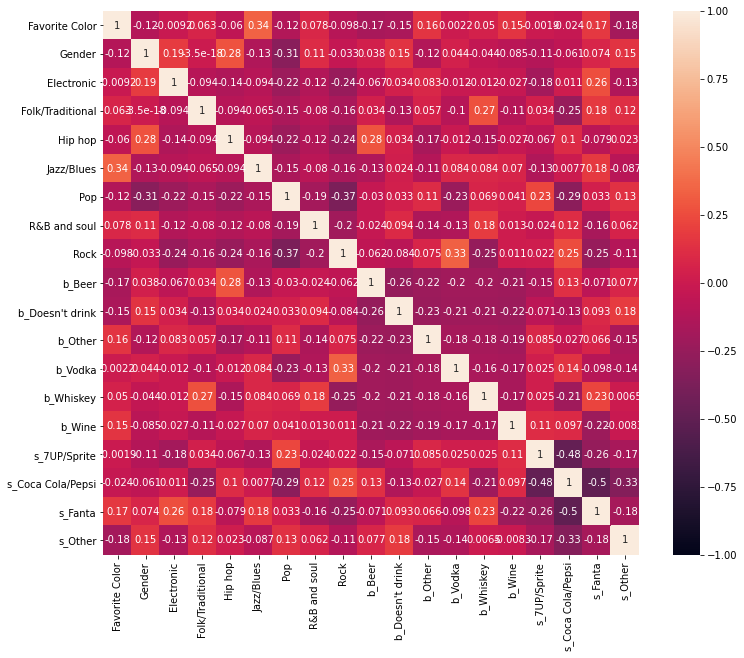

In [22]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

**Splitting and Scaling the Data**

In [24]:
y = data['Gender']
X = data.drop('Gender', axis=1)

In [26]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [27]:
X


,Favorite Color,Electronic,Folk/Traditional,Hip hop,Jazz/Blues,Pop,R&B and soul,Rock,b_Beer,b_Doesn't drink,b_Other,b_Vodka,b_Whiskey,b_Wine,s_7UP/Sprite,s_Coca Cola/Pepsi,s_Fanta,s_Other
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
62,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
63,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [29]:
y.sum() / len(y)


0.5

In [31]:

inputs = tf.keras.Input(shape=(18,))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


batch_size = 32
epochs = 24

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    verbose=0
)

**Results**

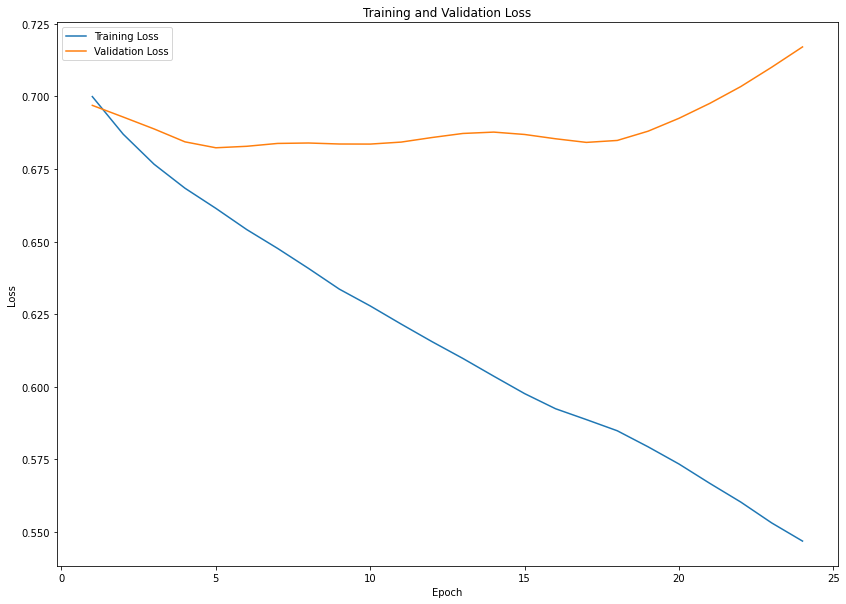

In [32]:
plt.figure(figsize=(14, 10))

epochs_range = range(1, epochs + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")

plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [33]:
np.argmin(val_loss)


4

In [34]:
model.evaluate(X_test, y_test)


1/1 [==============================] - 0s 16ms/step - loss: 0.6805 - accuracy: 0.6000


[0.6804768443107605, 0.6000000238418579]

In [35]:
len(y_test)


20